## Predicting the energy efficiency of buildings.
Energy efficiency in buildings is crucial, yet strongly influenced by design choices. The layout, materials, and orientation of a building determine how much energy is needed for heating, cooling, and lighting. Thoughtful design can significantly reduce energy use, cut costs, and create more comfortable, sustainable spaces.

### The dataset 
We are working on is UCI Energy Efficiency dataset, created by researchers at the University of California, Irvine. The dataset contains real data from 768 building simulations that explores how design choices impact heating and cooling needs.

In [ ]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading and examining the dataset
energy_efficiency = pd.read_csv("ENB2012_data.csv")
energy_efficiency.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


According to the dataset description provided in the source, the column naming corresponds to the following:
- X1: Relative Compactness
- X2: Surface Area
- X3: Wall Area
- X4: Roof Area
- X5: Overall Height
- X6: Orientation
- X7: Glazing Area
- X8: Glazing Area Distribution
- y1: Heating Load
- y2: Cooling Load

In the next step I will rename the columns accordingly to more self-explanatory names. 
Also, we will get basic information about the dataset - mainly to understand if there are null values, missing data or not suitable data types.

In [ ]:
#Renaming columns for clarity
column_mapping = {
    'X1': 'relative_compactness',
    'X2': 'surface_area', 
    'X3': 'wall_area',
    'X4': 'roof_area',
    'X5': 'overall_height',
    'X6': 'orientation',
    'X7': 'glazing_area',
    'X8': 'glazing_area_distribution',
    'Y1': 'heating_load',
    'Y2': 'cooling_load'
}
energy_efficiency.rename(columns=column_mapping, inplace=True)
energy_efficiency.head() #to check if renaming worked
energy_efficiency.info() 

The dataset contains 768 rows, there are no empty of missing values. 
All the values are numeric, which makes it suitable for further work with scikit learn. 


### Feature values distributions

Next, I'll explore the distributions of feature values and visualize them.

In [30]:
#Getting more information on distribution of values in the dataset
energy_efficiency.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


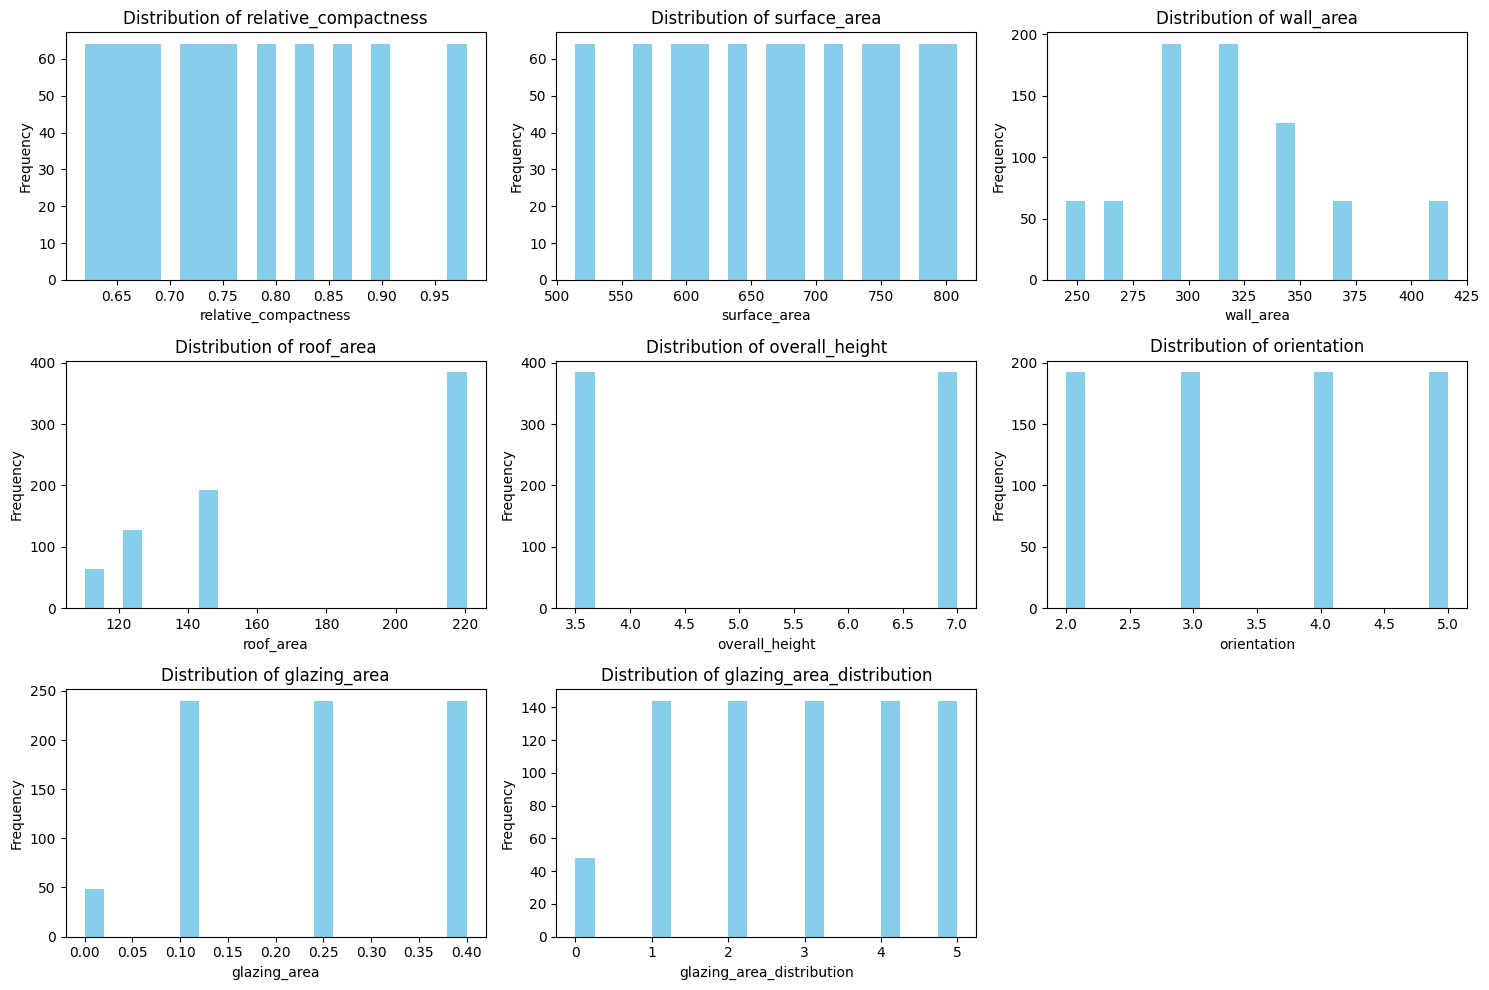

In [49]:
import seaborn as sns

# Visualizing distributions of features
features = energy_efficiency.columns[:-2]  # Excluding heating and cooling loads
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    plt.hist(energy_efficiency[feature], bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

Dataset feature values vary on very different scales.

### Correlations.

To understand relationships in the dataset, I'll exprore correlations between building features and the heating & cooling load. It will help us focus predictive model building on stronger correlations, and help understand if the features and equally important for heating and cooling, or if they should be examined separately.

I will visualize ccorrelations in a correlation matrix.

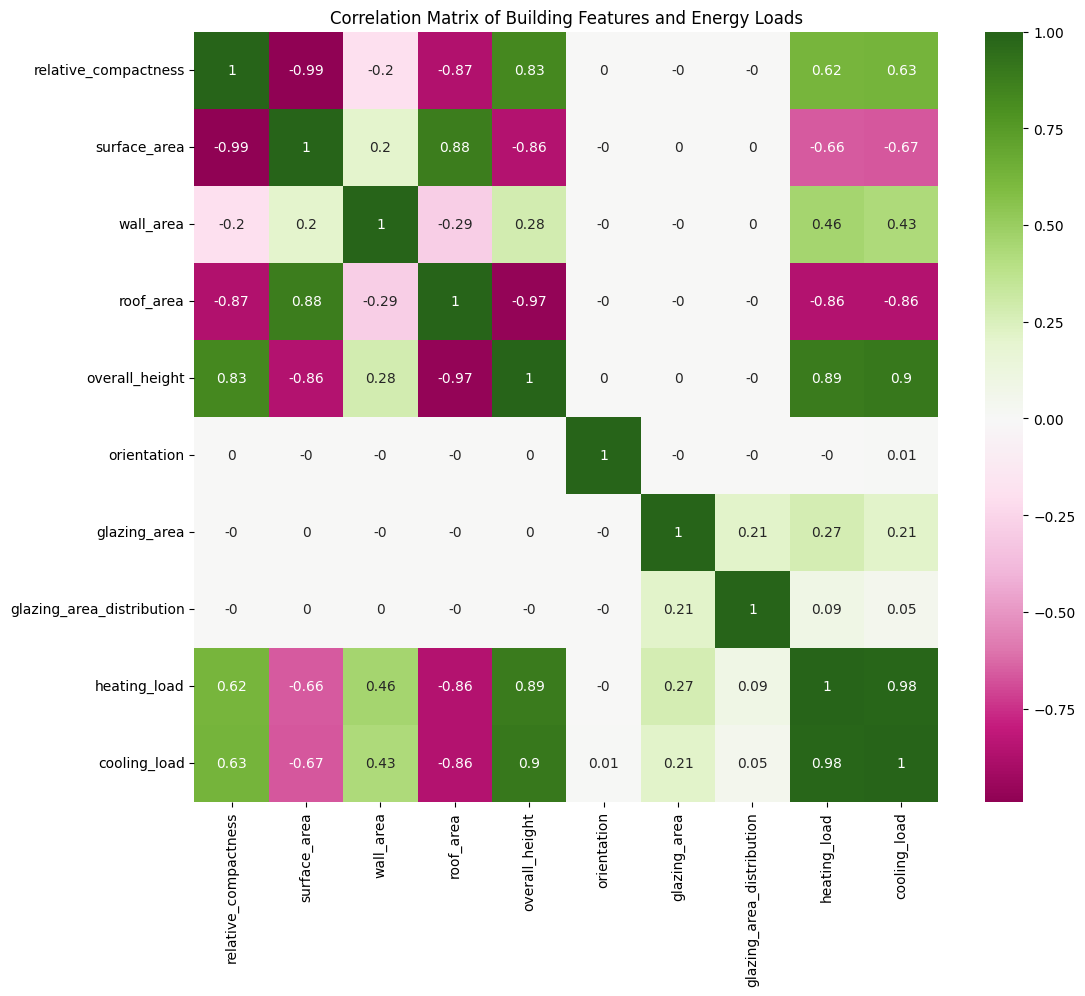

In [ ]:
# Correlation matrix
corr_matrix = energy_efficiency.corr().round(2)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="PiYG", center=0)
plt.title('Correlation Matrix of Building Features and Energy Loads')
plt.show()

In [ ]:
# Focusing on the strongest (positive and negative) correlations with target variables
heating_corr = energy_efficiency.corr()['heating_load'].sort_values(key=abs, ascending=False).drop('heating_load')
cooling_corr = energy_efficiency.corr()['cooling_load'].sort_values(key=abs, ascending=False).drop('cooling_load')

print("Top correlations with Heating Load:")
print(heating_corr)
print("Top correlations with Cooling Load:")
print(cooling_corr)

Top correlations with Heating Load:
cooling_load                 0.975862
overall_height               0.889431
roof_area                   -0.861828
surface_area                -0.658120
relative_compactness         0.622272
wall_area                    0.455671
glazing_area                 0.269841
glazing_area_distribution    0.087368
orientation                 -0.002587
Name: heating_load, dtype: float64
Top correlations with Cooling Load:
heating_load                 0.975862
overall_height               0.895785
roof_area                   -0.862547
surface_area                -0.672999
relative_compactness         0.634339
wall_area                    0.427117
glazing_area                 0.207505
glazing_area_distribution    0.050525
orientation                  0.014290
Name: cooling_load, dtype: float64


As we can see, heating and cooling loads show very strong correlation - this is why I will approach them both identically. 
Strong correlations are shown by the features:
1. Overall Height
2. Roof Area
3. Surface Area
4. Relative Compactness


To make a final selection of features, I'll visualize intersections of values for target variable and features as scatterplots for each feature. This will help us get a better idea of whether there are hidden patterns in the data.

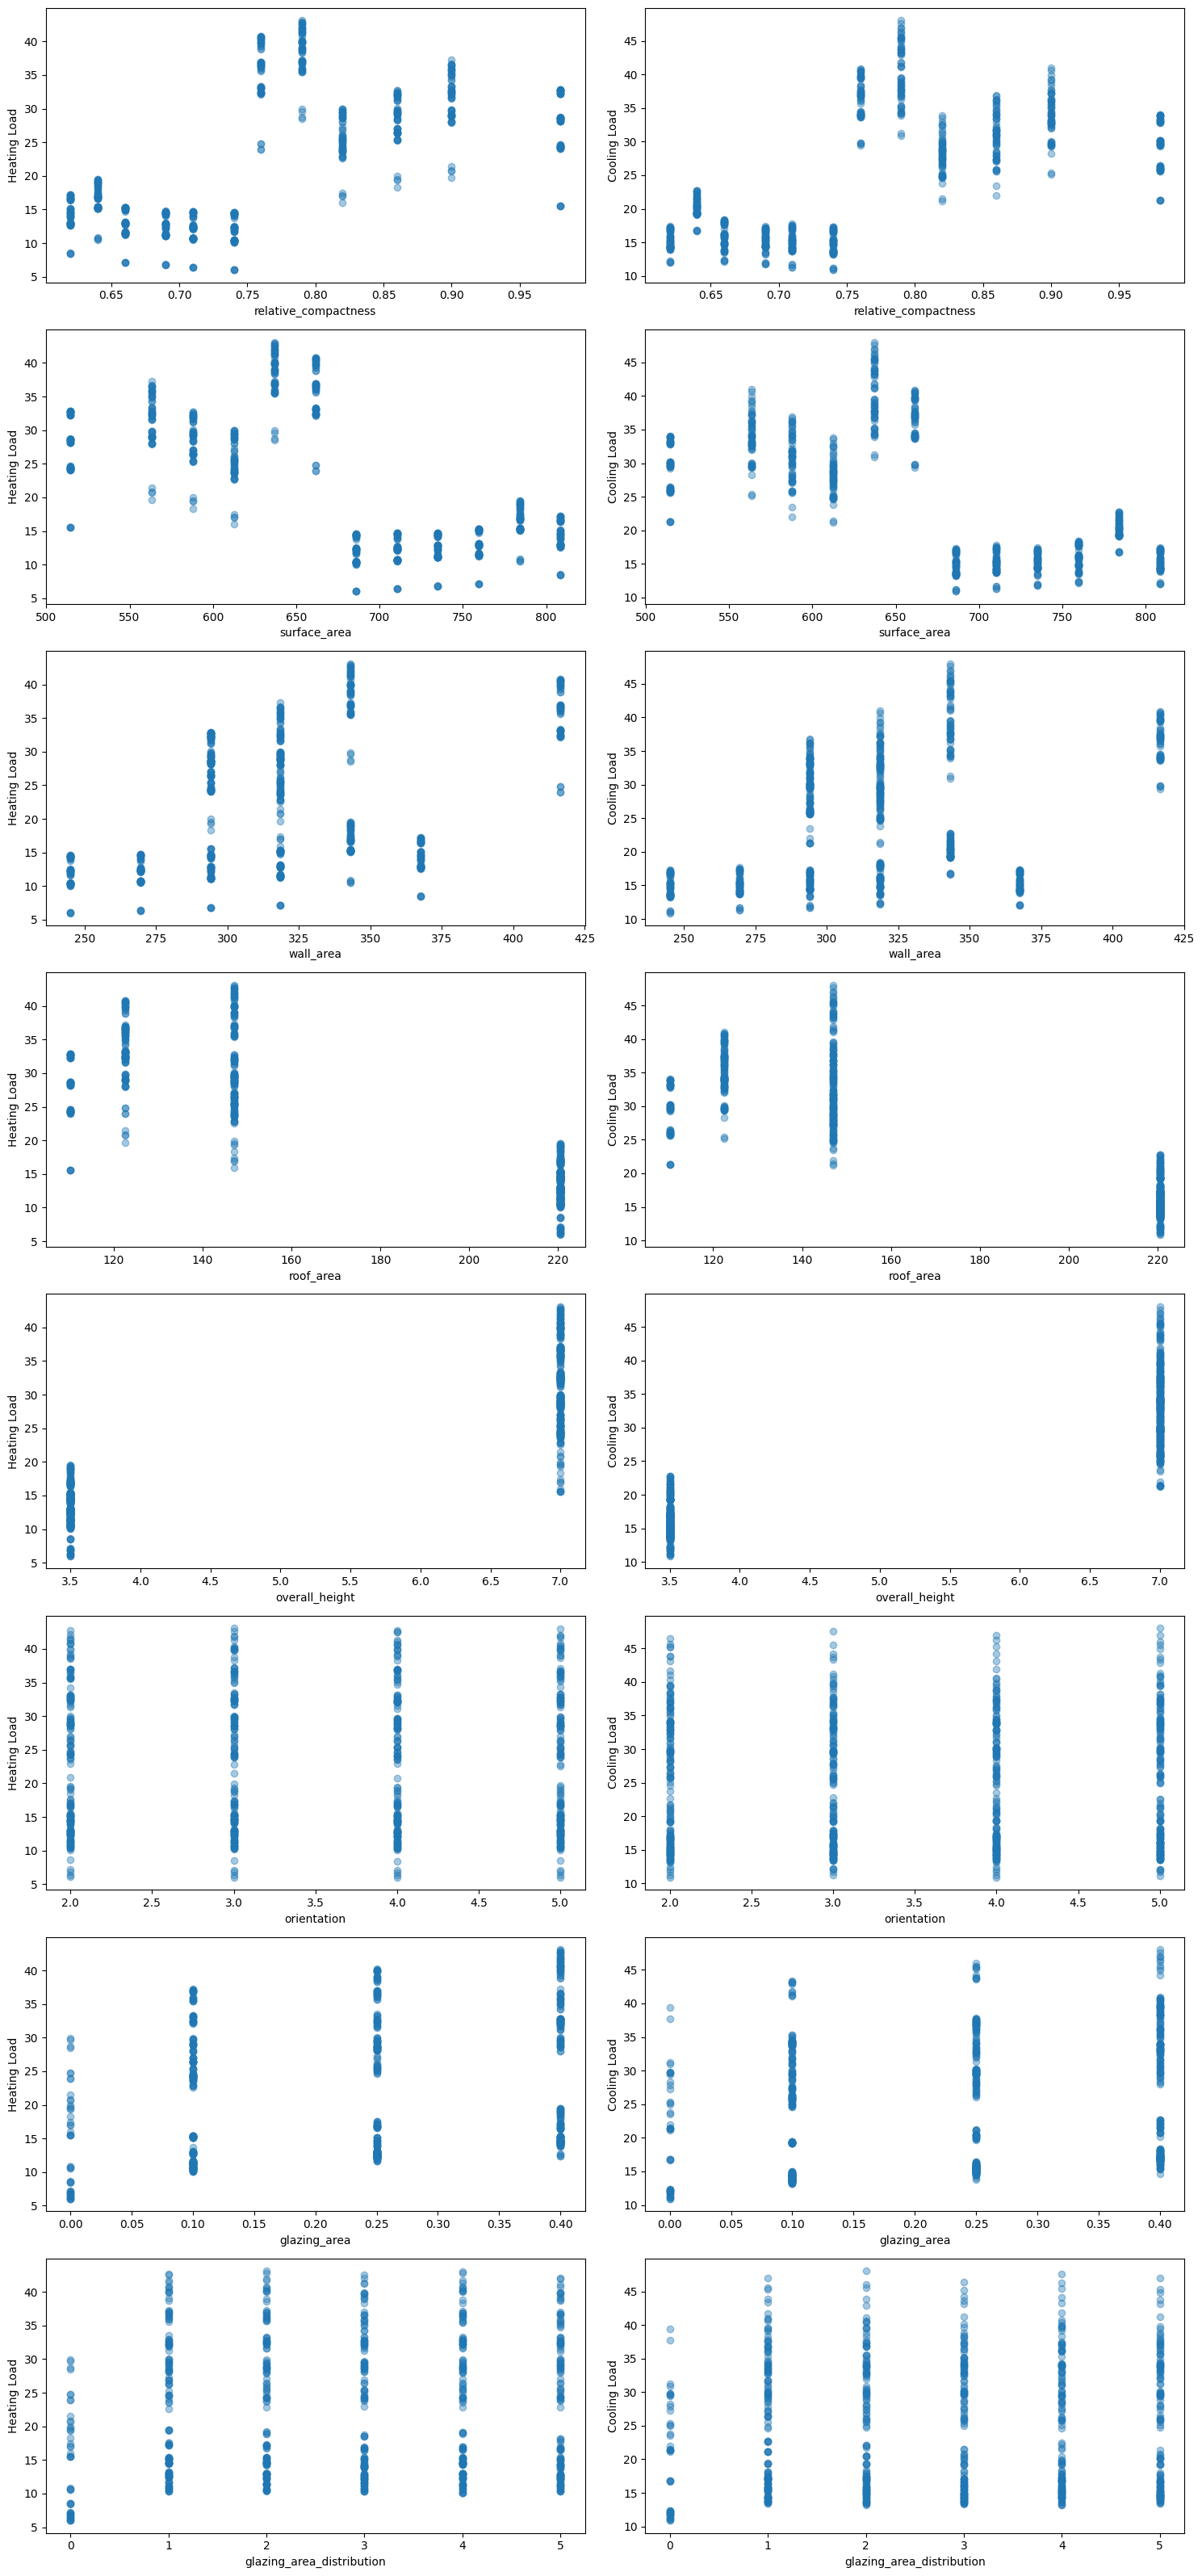

In [50]:
# Scatter plots for each feature vs targets
features = [col for col in energy_efficiency.columns if col not in ['heating_load', 'cooling_load']]
fig, axes = plt.subplots(len(features), 2, figsize=(15, 4*len(features)))

for i, feature in enumerate(features):
    axes[i,0].scatter(energy_efficiency[feature], energy_efficiency['heating_load'], alpha=0.4)
    axes[i,0].set_xlabel(feature)
    axes[i,0].set_ylabel('Heating Load')
    
    axes[i,1].scatter(energy_efficiency[feature], energy_efficiency['cooling_load'], alpha=0.4)
    axes[i,1].set_xlabel(feature)
    axes[i,1].set_ylabel('Cooling Load')

plt.tight_layout()
plt.show()

### Feature Selection.
The scatterplots of features with weaker correlation (Orientation, Glazing Area, Glazing Area Distribution) don't show a clear pattern - which means they likely won't be useful in a predictive model. I will drop them and focus on the remaining features: 
1. Overall Height
2. Roof Area
3. Surface Area
4. Relative Compactness
5. Wall Area

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Selecting features based on correlation analysis
selected_features = ['relative_compactness', 'surface_area', 'roof_area', 'overall_height', 'wall_area']
targets = ['heating_load', 'cooling_load']

X = energy_efficiency[selected_features]
y_heating = energy_efficiency['heating_load']
y_cooling = energy_efficiency['cooling_load']


### Splitting Data
Next, we will split the data into training and testing sets with a 80/20 ratio.

In [ ]:
# Splitting data into training and testing sets

#for heating load
X_train_heat, X_test_heat, y_train_heat, y_test_heat = train_test_split(
    X, y_heating, 
    test_size=0.2,      # 80% train, 20% test
    random_state=42,    # for reproducibility
    shuffle=True        # shuffle before splitting
)

#for cooling load
X_train_cool, X_test_cool, y_train_cool, y_test_cool = train_test_split(
    X, y_cooling, 
    test_size=0.2,      # 80% train, 20% test
    random_state=42,    # for reproducibility       
    shuffle=True        # shuffle before splitting
)

### Training models

The models selected are Linear Regression and Random Forest. The coefficients of a Linear Regression model will tell us about the direct dependencies between building features and energy efficiency, while the results of Random Forest will help us determine the importance of each feature. 

There is no need to scale data for these two models. 

For Random Forest, I will use 100 decision trees as an optimal number for both prediction stability and reduced risk of overfitting.

In [64]:
# Linear regression
lr_heat = LinearRegression().fit(X_train_heat, y_train_heat)
lr_cool = LinearRegression().fit(X_train_cool, y_train_cool)

# Random Forest
rf_heat = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_heat, y_train_heat)
rf_cool = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_cool, y_train_cool)

# Predictions with linear regression model
y_heat_pred_lr = lr_heat.predict(X_test_heat)
y_cool_pred_lr = lr_cool.predict(X_test_cool)

# Predictions with random forest
y_heat_pred_rf = rf_heat.predict(X_test_heat)
y_cool_pred_rf = rf_cool.predict(X_test_cool)



In [ ]:
#Linear regression coefficients
abs_coefs = np.abs(lr_heat.coef_)

# Optional: put in a DataFrame for readability
coef_heat_df = pd.DataFrame({
    "Feature": X_train_heat.columns,
    "Coefficient": lr_heat.coef_,
    "Abs_Coefficient": abs_coefs
}).sort_values(by="Abs_Coefficient", ascending=False)

coef_cool_df = pd.DataFrame({
    "Feature": X_train_cool.columns,
    "Coefficient": lr_cool.coef_,
    "Abs_Coefficient": np.abs(lr_cool.coef_)
}).sort_values(by="Abs_Coefficient", ascending=False)

print("Feature Coefficients (Linear Regreassion):")
print("Heating Load:")
print(coef_heat_df)
print("Cooling Load:")
print(coef_cool_df)



Feature Coefficients (Linear Regreassion):
Heating Load:
                Feature  Coefficient  Abs_Coefficient
0  relative_compactness   -71.353924        71.353924
3        overall_height     3.930201         3.930201
1          surface_area    -0.072391         0.072391
2             roof_area    -0.054619         0.054619
4             wall_area     0.036846         0.036846
Cooling Load:
                Feature  Coefficient  Abs_Coefficient
0  relative_compactness   -77.789973        77.789973
3        overall_height     3.907944         3.907944
1          surface_area    -0.077925         0.077925
2             roof_area    -0.051452         0.051452
4             wall_area     0.024980         0.024980


In [86]:
# Feature importance from Random Forest
print("Feature Importance (Random Forest):")
heating_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Heating Load Importance': rf_heat.feature_importances_,
}).sort_values(by= "Heating Load Importance", ascending=False)
print(heating_importance_df)

cooling_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Cooling Load Importance': rf_cool.feature_importances_,
}).sort_values(by = "Cooling Load Importance", ascending=False)
print(cooling_importance_df)


Feature Importance (Random Forest):
                Feature  Heating Load Importance
0  relative_compactness                 0.513344
1          surface_area                 0.214162
2             roof_area                 0.158456
3        overall_height                 0.078743
4             wall_area                 0.035296
                Feature  Cooling Load Importance
0  relative_compactness                 0.413557
3        overall_height                 0.338244
1          surface_area                 0.110958
2             roof_area                 0.089865
4             wall_area                 0.047377


### Feature importance

Using Linear Regression coefficients, we can determine linear influence on target variable. Both for heating and for cooling load the strongest influence is from Relative Compactness, with a big difference compared to other features.

According to our Random Forest models, the important features are different for heating and cooling load. 
The one with most importance in both cases is Relative Compactness, having about 50% and 40% of the influence in the heating load and cooling load models respectively. Surface Area is another feature with high predictive power in both models. Roof Area has higher importance for heating load, while Overall Height appears more important for cooling load.

### Evaluating models usung R² and RMSE. 

R² helps determine how much better the model is than just guessing, while RMSE described the model's accuracy in units. I've used the following benchmarks for interpretation:

- R² Benchmarks:
    - R² > 0.90: Excellent model, suitable for design decisions
    - R² = 0.80-0.90: Good model, useful for planning
    - R² = 0.60-0.80: Moderate model, needs improvement
    - R² < 0.60: Poor model, major issues

- RMSE Benchmarks:
    - RMSE < 5% of mean: Excellent accuracy
    - RMSE = 5-10% of mean: Good accuracy
    - RMSE = 10-20% of mean: Moderate accuracy
    - RMSE > 20% of mean: Poor accuracy

In [87]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def evaluate_model(y_true, y_pred, model_name="Model"):
    """Calculate and interpret R² and RMSE"""
    
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mean_actual = np.mean(y_true)
    rmse_percentage = (rmse / mean_actual) * 100
    
    print(f"{model_name} Performance:")
    print(f"R² Score: {r2:.3f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"RMSE as % of mean: {rmse_percentage:.1f}%")

     # Interpretation
    if r2 > 0.9:
        print("✅ Excellent model performance")
    elif r2 > 0.8:
        print("✅ Good model performance")
    elif r2 > 0.6:
        print("⚠️ Moderate model performance")
    else:
        print("❌ Poor model performance")

    if rmse_percentage < 10:
        print("✅ Low error relative to mean")
    elif rmse_percentage < 20:
        print("⚠️ Moderate error relative to mean")
    else:
        print("❌ High error relative to mean")
 


# Evaluating models
evaluate_model(y_test_heat, y_heat_pred_lr, model_name="Linear Regression - Heating Load")  
evaluate_model(y_test_heat, y_heat_pred_rf, model_name="Random Forest - Heating Load")

evaluate_model(y_test_cool, y_cool_pred_lr, model_name="Linear Regression - Cooling Load")
evaluate_model(y_test_cool, y_cool_pred_rf, model_name="Random Forest - Cooling Load")


Linear Regression - Heating Load Performance:
R² Score: 0.850
RMSE: 3.96
RMSE as % of mean: 17.3%
✅ Good model performance
⚠️ Moderate error relative to mean
Random Forest - Heating Load Performance:
R² Score: 0.910
RMSE: 3.06
RMSE as % of mean: 13.3%
✅ Excellent model performance
⚠️ Moderate error relative to mean
Linear Regression - Cooling Load Performance:
R² Score: 0.854
RMSE: 3.68
RMSE as % of mean: 14.5%
✅ Good model performance
⚠️ Moderate error relative to mean
Random Forest - Cooling Load Performance:
R² Score: 0.918
RMSE: 2.76
RMSE as % of mean: 10.9%
✅ Excellent model performance
⚠️ Moderate error relative to mean


### Conclusions.

Out of the 4 created models, the best performance is shown by the Random Forest - Cooling Load Performance one: it has the highest R² Score, and the lowest RMSE. 
Overall, the R² Score is in general a strong point of every model - it means they are predicting patterns significantly better than just random-guessing. However, the RMSE is higher than it should be in each model, so their accuracy has to be improved and currently the price of a model error is high.

Our findings are that Relative Compactness is the strongest energy efficiency predictor. Energy-efficient buildings should be compact and with small surface area.